In [ ]:
# Ref: https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [3]:
def make_hello(N=1000, rseed=42):
    # Make a plot with "HELLO" text; save as PNG
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)
    
    # Open this PNG and draw random points from it
    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]


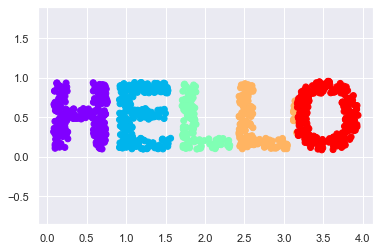

In [24]:
X = make_hello(1000)
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis('equal');


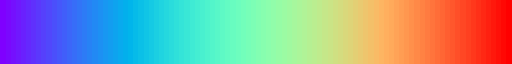

In [22]:
plt.cm.get_cmap('rainbow', 5)

In [11]:
colorize.keys()

dict_keys(['c', 'cmap'])

In [27]:
def rotate(X, degrees, debug=False):
    theta = np.deg2rad(degrees)
    R = [[np.cos(theta), np.sin(theta)],
         [-np.sin(theta), np.cos(theta)]]
    if debug:
        print(f"X = {X}")
        print(f"R = {R}")
    return np.dot(X, R)

In [33]:
test_matrix = [[2,1]]
rotate(test_matrix, 90, True)

X = [[2, 1]]
R = [[6.123233995736766e-17, 1.0], [-1.0, 6.123233995736766e-17]]


array([[-1.,  2.]])

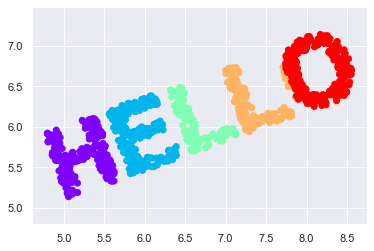

In [34]:
X2 = rotate(X, 20) + 5
plt.scatter(X2[:, 0], X2[:, 1], **colorize)
plt.axis('equal');

In [35]:
from sklearn.metrics import pairwise_distances
D = pairwise_distances(X)
print(D.shape)

(1000, 1000)


/var/folders/pp/st7r4cq55bddv8kl4v7w297r0000gn/T/ipykernel_10514/4135801411.py:2: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


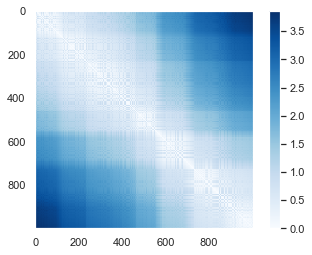

In [40]:
plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar()

In [41]:
D2 = pairwise_distances(X2)
np.allclose(D, D2)

True

(-1.0291497799483869,
 1.0278567681719455,
 -2.0494894050096306,
 2.1202816440434114)

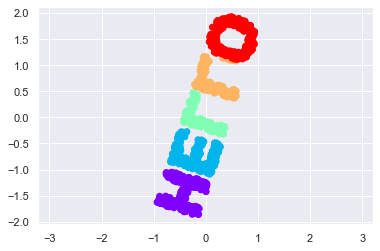

In [43]:
from sklearn.manifold import MDS
model = MDS(n_components=2, dissimilarity='precomputed', random_state=1)
out = model.fit_transform(D)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal')

(-2.231958054121628,
 2.237775039233551,
 -0.05500000000000001,
 0.05500000000000001)

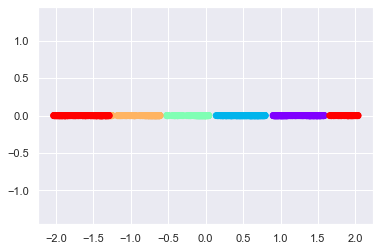

In [60]:
model2 = MDS(n_components=1, dissimilarity='precomputed', random_state=1)
out2 = model2.fit_transform(D2)
# plt.scatter(out2[:, 0], out2[:, 1], **colorize)
plt.scatter(out2[:, 0], np.zeros([len(out2),], dtype=int), **colorize)
plt.axis('equal')

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow_base/lib/python3.8/site-packages/matplotlib/collections.py:982: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


(-0.5790480303414266,
 0.5649814789023684,
 -1.8234415402852566,
 1.8902815997668203)

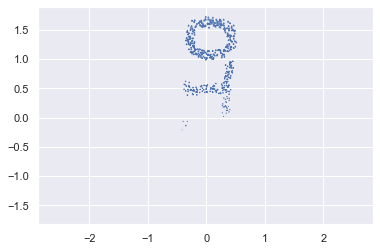

In [63]:
model3 = MDS(n_components=3, dissimilarity='precomputed', random_state=1)
out3 = model3.fit_transform(D2)
plt.scatter(out3[:, 0], out3[:, 1], out3[:, 2], marker='^')
# plt.scatter(out3[:, 0], np.zeros([len(out2),], dtype=int), **colorize)
plt.axis('equal')

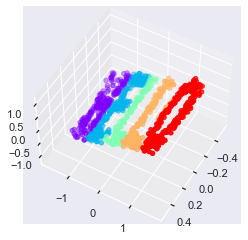

In [70]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(out3[:, 0], out3[:, 1], out3[:, 2],
             **colorize)
ax.view_init(azim=30, elev=50)

In [71]:
def random_projection(X, dimension=3, rseed=42):
    assert dimension >= X.shape[1]
    rng = np.random.RandomState(rseed)
    C = rng.randn(dimension, dimension)
    e, V = np.linalg.eigh(np.dot(C, C.T))
    return np.dot(X, V[:X.shape[1]])
    
X3 = random_projection(X, 3)
X3.shape

(1000, 3)

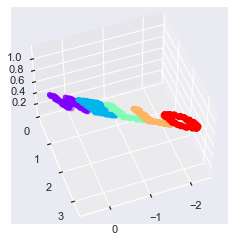

In [72]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(X3[:, 0], X3[:, 1], X3[:, 2],
             **colorize)
ax.view_init(azim=70, elev=50)

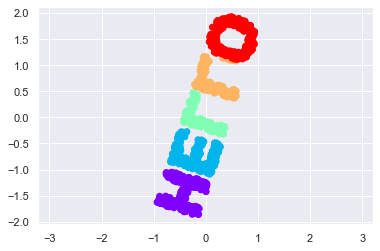

In [73]:
model = MDS(n_components=2, random_state=1)
out3 = model.fit_transform(X3)
plt.scatter(out3[:, 0], out3[:, 1], **colorize)
plt.axis('equal');

This is essentially the goal of a manifold learning estimator: given high-dimensional embedded data, it seeks a low-dimensional representation of the data that preserves certain relationships within the data. In the case of MDS, the quantity preserved is the distance between every pair of points.
Ref: https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html#MDS-as-Manifold-Learning